In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import pandas as pd
from scipy import stats

In [2]:
notebook_path = %pwd

os.chdir(Path(notebook_path).parent)
os.getcwd()

'/home/atleeri/repositories/forecast-electricity-markets'

Load processed data

In [9]:
processed_data_dir = Path('data/processed')
filepaths = list(processed_data_dir.glob('**/*60*.parquet'))
filepaths

[PosixPath('data/processed/opsd-time_series-2020-10-06/time_series_60min_singleindex.parquet')]

In [10]:
filepath = filepaths[0]
df = pd.read_parquet(filepath)
df

,utc_timestamp,cet_cest_timestamp,DE_wind_generation,DE_price_ahead
0,2014-12-31 23:00:00+00:00,2015-01-01 00:00:00+01:00,NaN,NaN
1,2015-01-01 00:00:00+00:00,2015-01-01 01:00:00+01:00,8852.0,NaN
2,2015-01-01 01:00:00+00:00,2015-01-01 02:00:00+01:00,9054.0,NaN
3,2015-01-01 02:00:00+00:00,2015-01-01 03:00:00+01:00,9070.0,NaN
4,2015-01-01 03:00:00+00:00,2015-01-01 04:00:00+01:00,9163.0,NaN
...,...,...,...,...
50396,2020-09-30 19:00:00+00:00,2020-09-30 20:00:00+01:00,10654.0,49.92
50397,2020-09-30 20:00:00+00:00,2020-09-30 21:00:00+01:00,11836.0,42.79
50398,2020-09-30 21:00:00+00:00,2020-09-30 22:00:00+01:00,12168.0,35.02
50399,2020-09-30 22:00:00+00:00,2020-09-30 23:00:00+01:00,12533.0,34.40


In [11]:
df.columns

Index(['utc_timestamp', 'cet_cest_timestamp', 'DE_wind_generation',
       'DE_price_ahead'],
      dtype='object')

In [20]:
df_sample = df.sample(n=50000, random_state=2025)

In [21]:
df_sample

,utc_timestamp,cet_cest_timestamp,DE_wind_generation,DE_price_ahead
20095,2017-04-17 06:00:00+00:00,2017-04-17 07:00:00+01:00,6150.0,NaN
47699,2020-06-10 10:00:00+00:00,2020-06-10 11:00:00+01:00,3769.0,34.90
48713,2020-07-22 16:00:00+00:00,2020-07-22 17:00:00+01:00,3007.0,42.19
46775,2020-05-02 22:00:00+00:00,2020-05-02 23:00:00+01:00,12000.0,18.00
18157,2017-01-26 12:00:00+00:00,2017-01-26 13:00:00+01:00,9436.0,NaN
...,...,...,...,...
20477,2017-05-03 04:00:00+00:00,2017-05-03 05:00:00+01:00,10479.0,NaN
30421,2018-06-21 12:00:00+00:00,2018-06-21 13:00:00+01:00,31757.0,NaN
8658,2015-12-27 17:00:00+00:00,2015-12-27 18:00:00+01:00,17564.0,NaN
12911,2016-06-21 22:00:00+00:00,2016-06-21 23:00:00+01:00,2824.0,NaN


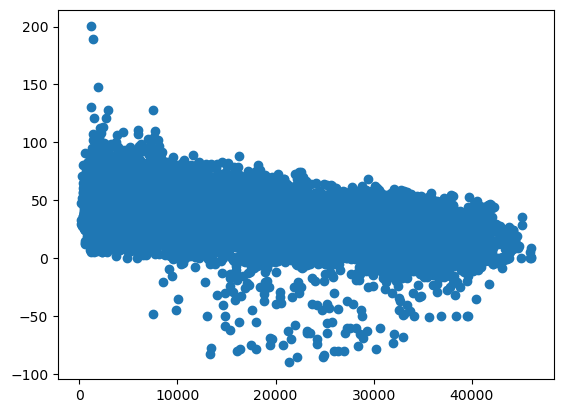

In [22]:
valid_mask = df_sample['DE_wind_generation'].notna() & df_sample['DE_price_ahead'].notna()
plt.scatter(df_sample[valid_mask]['DE_wind_generation'], df_sample[valid_mask]['DE_price_ahead'])

Linear regression

In [16]:
rng = np.random.default_rng()
X = df_sample[valid_mask]['DE_wind_generation']
y = df_sample[valid_mask]['DE_price_ahead']

reg = stats.linregress(X, y)
reg

LinregressResult(slope=np.float64(-0.0007288279132473524), intercept=np.float64(46.010625778097825), rvalue=np.float64(-0.3826787334254151), pvalue=np.float64(6.770717120510772e-14), stderr=np.float64(9.338836105405775e-05), intercept_stderr=np.float64(1.6890955688214855))